# 정리

In [ ]:
data.rename(index =str.title) 
data.index = [x.title() for x in data.index]
# 인덱스 첫글자만 대문자 바꾸기 

# 최소 요약 코드 

import pandas as pd
import re
import konlpy
a=pd.read_excel("jejudoGwanGwang.xlsx")

b=pd.read_excel("jejuMatJip.xlsx")

c=pd.read_excel("jejuYeoHang.xlsx")

d=pd.read_excel("jejudoMatJip.xlsx")

df=pd.concat([a,b,c,d])

location_counts =df['place'].value_counts()
location_counts_df = pd.DataFrame(location_counts)
location_counts_df
location_counts_df=location_counts_df.reset_index()
location_counts_df
locations= list(location_counts.index)
locations
from geopy.geocoders import Nominatim

def geocoding(address):
    geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
    geo = geolocoder.geocode(address)
    crd = {"lat": str(geo.latitude), "lng": str(geo.longitude)}

    return crd

crd = geocoding("대구 태전동")
print(crd['lat'])
print(crd['lng'])

import numpy as np
crd = []
for i in range(len(locations)):
    try:
        crd.append(geocoding(locations[i]))
    except:
        crd.append(np.nan) 
crd

locations_inform_df = pd.DataFrame({'지역명' : locations, '위치' : crd})
locations_inform_df


df2 = locations_inform_df[locations_inform_df.위치.isna() != 1]

df2 

df2=df2.reset_index()
df2

df2['위도'] = 0
df2['경도'] = 0
for i in range(len(df2.위치)): # 위치칼럼 전체에서 lat만 가져옴 
    df2['위도'].iloc[i] = float(df2.위치[:][i]['lat'])
    df2['경도'].iloc[i] = float(df2.위치[:][i]['lng'])
df2  


df=df2
jeju_map = folium.Map(location=[33.362500, 126.533694], zoom_start =12)

for name, lat, long in zip(df2['지역명'], df2['위도'], df2['경도']):
    folium.Marker([lat, long], tooltip= name).add_to(jeju_map)
jeju_map


# 복습문제 지도 시각화

In [1]:
import time

In [2]:
import datetime

In [4]:
now=datetime.datetime.now()

In [7]:
last = datetime.datetime(2022,12,31)
last - now 


datetime.timedelta(days=87, seconds=53450, microseconds=185258)

In [8]:
from datetime import datetime


In [7]:
import pandas as pd
import numpy as np
string_data=pd.Series(['aardvark','artichoke','np.nan','avocado'])

string_data 


0     aardvark
1    artichoke
2       np.nan
3      avocado
dtype: object

In [8]:
pd.isna(string_data) 


0    False
1    False
2    False
3    False
dtype: bool

In [12]:
import numpy as np
data=pd.DataFrame(np.arange(12).reshape((3,4)),

                 index=['ohio','colorado','NewYork'],

                 columns=['one','two','three','four'])

data 


,one,two,three,four
ohio,0,1,2,3
colorado,4,5,6,7
NewYork,8,9,10,11


In [13]:
data.index.str.title() 

Index(['Ohio', 'Colorado', 'Newyork'], dtype='object')

In [15]:
data.rename(index =str.title) 
data.index = [x.title() for x in data.index]
# 인덱스 첫글자만 대문자 바꾸기 

In [19]:
import pandas as pd
pd.date_range('2022-8-23', periods=10, freq="7D" )
pd.date_range(start = '2022-08-23', periods = 10, freq = '1w') 


DatetimeIndex(['2022-08-23', '2022-08-30', '2022-09-06', '2022-09-13',
               '2022-09-20', '2022-09-27', '2022-10-04', '2022-10-11',
               '2022-10-18', '2022-10-25'],
              dtype='datetime64[ns]', freq='7D')

In [20]:
import pydataset

In [34]:
titanic=pydataset.data('titanic')
pd.crosstab(index = titanic['class'], columns = titanic['survived'], margins = True) 

df=pd.crosstab(titanic['class'], titanic['survived'], margins=True) # aggfunc을 사용안함

In [22]:
titanic

,class,age,sex,survived
1,1st class,adults,man,yes
2,1st class,adults,man,yes
3,1st class,adults,man,yes
4,1st class,adults,man,yes
5,1st class,adults,man,yes
...,...,...,...,...
1312,3rd class,child,women,no
1313,3rd class,child,women,no
1314,3rd class,child,women,no
1315,3rd class,child,women,no


In [35]:
categories = ['one','two','three']

codes = [0,1,1,2,0,2,2,1,2,1,2,0] 
pd.Categorical.from_codes(codes, categories ,ordered=True)

['one', 'two', 'two', 'three', 'one', ..., 'two', 'three', 'two', 'three', 'one']
Length: 12
Categories (3, object): ['one' < 'two' < 'three']

In [37]:
now.strftime('%Y-%m-%d-%H-%M-%S')


'2022-10-04-09-09-09'

In [41]:
ts =pd.Series(np.random.randn(100), index=pd.date_range('1/1/2000' , periods=100))

ts['2000-02-01':'2000-02-15'] 


2000-02-01   -2.611906
2000-02-02    1.353258
2000-02-03   -0.212962
2000-02-04    0.957160
2000-02-05    1.645250
2000-02-06   -0.094813
2000-02-07   -2.599146
2000-02-08    2.287217
2000-02-09   -1.952778
2000-02-10   -0.207187
2000-02-11   -0.652799
2000-02-12   -1.205635
2000-02-13    0.284128
2000-02-14    0.396378
2000-02-15   -0.019581
Freq: D, dtype: float64

In [42]:
ts.truncate(before='2000-02-1',after= '2000-2-15') 

2000-02-01   -2.611906
2000-02-02    1.353258
2000-02-03   -0.212962
2000-02-04    0.957160
2000-02-05    1.645250
2000-02-06   -0.094813
2000-02-07   -2.599146
2000-02-08    2.287217
2000-02-09   -1.952778
2000-02-10   -0.207187
2000-02-11   -0.652799
2000-02-12   -1.205635
2000-02-13    0.284128
2000-02-14    0.396378
2000-02-15   -0.019581
Freq: D, dtype: float64

In [44]:
datetime.strptime('2004-03-11')

TypeError: strptime() takes exactly 2 arguments (1 given)

In [46]:
from dateutil.parser import parse
strptime,# 벗기다. to_datetime, parser_parse 
# 문자열을 데이트타임르로 바꾸는 법
pd.strft


NameError: name 'strptime' is not defined

In [47]:
## 실전예제

In [48]:
https://github.com/youngwoos/Doit_Python
https://github.com/wesm/pydata-book/tree/3rd-edition/datasets/fec

SyntaxError: invalid syntax (3119108285.py, line 1)

In [93]:
fec= pd.read_csv("https://raw.githubusercontent.com/benrolfs/pydata/master/ch09/P00000001-ALL.csv")

C:\Users\admin\AppData\Local\Temp\ipykernel_8136\1083512062.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  fec= pd.read_csv("https://raw.githubusercontent.com/benrolfs/pydata/master/ch09/P00000001-ALL.csv")


In [52]:
fec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001731 entries, 0 to 1001730
Data columns (total 16 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   cmte_id            1001731 non-null  object 
 1   cand_id            1001731 non-null  object 
 2   cand_nm            1001731 non-null  object 
 3   contbr_nm          1001731 non-null  object 
 4   contbr_city        1001712 non-null  object 
 5   contbr_st          1001727 non-null  object 
 6   contbr_zip         1001620 non-null  object 
 7   contbr_employer    988002 non-null   object 
 8   contbr_occupation  993301 non-null   object 
 9   contb_receipt_amt  1001731 non-null  float64
 10  contb_receipt_dt   1001731 non-null  object 
 11  receipt_desc       14166 non-null    object 
 12  memo_cd            92482 non-null    object 
 13  memo_text          97770 non-null    object 
 14  form_tp            1001731 non-null  object 
 15  file_num           1001731 non-n

In [53]:
fec.iloc[123456]

cmte_id                             C00431445
cand_id                             P80003338
cand_nm                         Obama, Barack
contbr_nm                         ELLMAN, IRA
contbr_city                             TEMPE
contbr_st                                  AZ
contbr_zip                          852816719
contbr_employer      ARIZONA STATE UNIVERSITY
contbr_occupation                   PROFESSOR
contb_receipt_amt                        50.0
contb_receipt_dt                    01-DEC-11
receipt_desc                              NaN
memo_cd                                   NaN
memo_text                                 NaN
form_tp                                 SA17A
file_num                               772372
Name: 123456, dtype: object

In [54]:
fec.cand_nm

0          Bachmann, Michelle
1          Bachmann, Michelle
2          Bachmann, Michelle
3          Bachmann, Michelle
4          Bachmann, Michelle
                  ...        
1001726           Perry, Rick
1001727           Perry, Rick
1001728           Perry, Rick
1001729           Perry, Rick
1001730           Perry, Rick
Name: cand_nm, Length: 1001731, dtype: object

In [94]:
unique_cands=fec.cand_nm.unique()

In [57]:
parties = {'Bachmann, Michelle': 'Republican',
 'Cain, Herman': 'Republican',
 'Gingrich, Newt': 'Republican',
 'Huntsman, Jon': 'Republican',
 'Johnson, Gary Earl': 'Republican',
 'McCotter, Thaddeus G': 'Republican',
 'Obama, Barack': 'Democrat',
 'Paul, Ron': 'Republican',
 'Pawlenty, Timothy': 'Republican',
 'Perry, Rick': 'Republican',
 "Roemer, Charles E. 'Buddy' III": 'Republican',
 'Romney, Mitt': 'Republican',
 'Santorum, Rick': 'Republican'} 


In [95]:
fec['party']=fec.cand_nm.map(parties)

In [96]:
(fec.contb_receipt_amt>0).value_counts()

True     991475
False     10256
Name: contb_receipt_amt, dtype: int64

In [66]:
fec.contb_receipt_amt.min() # 환급받아서 마이너스

-30800.0

In [97]:
fec=fec[fec.contb_receipt_amt>0]

In [68]:
fec

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
0,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,250.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
1,C00410118,P20002978,"Bachmann, Michelle","HARVEY, WILLIAM",MOBILE,AL,366010290.0,RETIRED,RETIRED,50.0,23-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
2,C00410118,P20002978,"Bachmann, Michelle","SMITH, LANIER",LANETT,AL,368633403.0,INFORMATION REQUESTED,INFORMATION REQUESTED,250.0,05-JUL-11,NaN,NaN,NaN,SA17A,749073,Republican
3,C00410118,P20002978,"Bachmann, Michelle","BLEVINS, DARONDA",PIGGOTT,AR,724548253.0,NONE,RETIRED,250.0,01-AUG-11,NaN,NaN,NaN,SA17A,749073,Republican
4,C00410118,P20002978,"Bachmann, Michelle","WARDENBURG, HAROLD",HOT SPRINGS NATION,AR,719016467.0,NONE,RETIRED,300.0,20-JUN-11,NaN,NaN,NaN,SA17A,736166,Republican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1001726,C00500587,P20003281,"Perry, Rick","GORMAN, CHRIS D. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,5000.0,29-SEP-11,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOMATIC),NaN,REATTRIBUTION / REDESIGNATION REQUESTED (AUTOMATIC),SA17A,751678,Republican
1001727,C00500587,P20003281,"Perry, Rick","DUFFY, DAVID A. MR.",INFO REQUESTED,XX,99999,DUFFY EQUIPMENT COMPANY INC.,BUSINESS OWNER,2500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican
1001728,C00500587,P20003281,"Perry, Rick","GRANE, BRYAN F. MR.",INFO REQUESTED,XX,99999,INFORMATION REQUESTED PER BEST EFFORTS,INFORMATION REQUESTED PER BEST EFFORTS,500.0,29-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican
1001729,C00500587,P20003281,"Perry, Rick","TOLBERT, DARYL MR.",INFO REQUESTED,XX,99999,T.A.C.C.,LONGWALL MAINTENANCE FOREMAN,500.0,30-SEP-11,NaN,NaN,NaN,SA17A,751678,Republican


In [98]:
fec_mrbo=fec[fec.cand_nm.isin(['Obama, Barack', 'Romney, Mitt'])]

In [77]:
fec_mrbo = fec[(fec.cand_nm == 'Obama, Barack')|(fec.cand_nm == 'Romney, Mitt')] 


In [79]:
cond1 = fec.cand_nm == 'Obama, Barack'
cond2 = fec.cand_nm == 'Romney, Mitt'
fec[cond1 | cond2]

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
411,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,340230183.0,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
412,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,340230183.0,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
413,C00431171,P80003353,"Romney, Mitt","CARLSEN, RICHARD",APO,AE,91280020.0,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,NaN,NaN,NaN,SA17A,785689,Republican
414,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE",APO,AE,91280005.0,CISCO,ENGINEER,30.0,21-AUG-11,NaN,NaN,NaN,SA17A,760261,Republican
415,C00431171,P80003353,"Romney, Mitt","SARGENT, MICHAEL",APO,AE,90120092.0,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,NaN,NaN,NaN,SA17A,780128,Republican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701381,C00431445,P80003338,"Obama, Barack","MOUNTS, ROBERT",APO,ZZ,962043077,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-FEB-12,NaN,NaN,NaN,SA17A,787803,Democrat
701382,C00431445,P80003338,"Obama, Barack","TAITANO, TYRONE",HAGATNA,ZZ,969323373,NOT EMPLOYED,RETIRED,250.0,20-JAN-12,NaN,NaN,NaN,SA17A,775668,Democrat
701383,C00431445,P80003338,"Obama, Barack","TUCKER, PAMELA",APO,ZZ,963190030,DODEA,EDUCATOR,3.0,20-JAN-12,NaN,NaN,NaN,SA17A,775668,Democrat
701384,C00431445,P80003338,"Obama, Barack","MOUNTS, ROBERT",APO,ZZ,962043077,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-APR-12,NaN,NaN,NaN,SA17A,785239,Democrat


In [76]:
fec_mrbo

,cmte_id,cand_id,cand_nm,contbr_nm,contbr_city,contbr_st,contbr_zip,contbr_employer,contbr_occupation,contb_receipt_amt,contb_receipt_dt,receipt_desc,memo_cd,memo_text,form_tp,file_num,party
411,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,340230183.0,US GOVERNMENT,FOREIGN SERVICE OFFICER,25.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
412,C00431171,P80003353,"Romney, Mitt","ELDERBAUM, WILLIAM",DPO,AA,340230183.0,US GOVERNMENT,FOREIGN SERVICE OFFICER,110.0,01-FEB-12,NaN,NaN,NaN,SA17A,780124,Republican
413,C00431171,P80003353,"Romney, Mitt","CARLSEN, RICHARD",APO,AE,91280020.0,DEFENSE INTELLIGENCE AGENCY,INTELLIGENCE ANALYST,250.0,13-APR-12,NaN,NaN,NaN,SA17A,785689,Republican
414,C00431171,P80003353,"Romney, Mitt","DELUCA, PIERRE",APO,AE,91280005.0,CISCO,ENGINEER,30.0,21-AUG-11,NaN,NaN,NaN,SA17A,760261,Republican
415,C00431171,P80003353,"Romney, Mitt","SARGENT, MICHAEL",APO,AE,90120092.0,RAYTHEON TECHNICAL SERVICES CORP,COMPUTER SYSTEMS ENGINEER,100.0,07-MAR-12,NaN,NaN,NaN,SA17A,780128,Republican
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
701381,C00431445,P80003338,"Obama, Barack","MOUNTS, ROBERT",APO,ZZ,962043077,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-FEB-12,NaN,NaN,NaN,SA17A,787803,Democrat
701382,C00431445,P80003338,"Obama, Barack","TAITANO, TYRONE",HAGATNA,ZZ,969323373,NOT EMPLOYED,RETIRED,250.0,20-JAN-12,NaN,NaN,NaN,SA17A,775668,Democrat
701383,C00431445,P80003338,"Obama, Barack","TUCKER, PAMELA",APO,ZZ,963190030,DODEA,EDUCATOR,3.0,20-JAN-12,NaN,NaN,NaN,SA17A,775668,Democrat
701384,C00431445,P80003338,"Obama, Barack","MOUNTS, ROBERT",APO,ZZ,962043077,HQ USFK (FKDC-SA),GS-15 INTERNATIONAL RELATIONS OFFICER,25.0,26-APR-12,NaN,NaN,NaN,SA17A,785239,Democrat


In [80]:
fec.contbr_occupation.value_counts()[:10]

RETIRED                                   233990
INFORMATION REQUESTED                      35107
ATTORNEY                                   34286
HOMEMAKER                                  29931
PHYSICIAN                                  23432
INFORMATION REQUESTED PER BEST EFFORTS     21138
ENGINEER                                   14334
TEACHER                                    13990
CONSULTANT                                 13273
PROFESSOR                                  12555
Name: contbr_occupation, dtype: int64

In [99]:
occ_mapping = {
 'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
 'INFORMATION REQUESTED' : 'NOT PROVIDED',
 'INFORMATION REQUESTED (BEST EFFORTS)' : 'NOT PROVIDED',
 'C.E.O.': 'CEO'} 


In [100]:
f = lambda x: occ_mapping.get(x, x)
fec.contbr_occupation = fec.contbr_occupation.map(f) 


In [101]:
emp_mapping = {
 'INFORMATION REQUESTED PER BEST EFFORTS' : 'NOT PROVIDED',
 'INFORMATION REQUESTED' : 'NOT PROVIDED',
 'SELF' : 'SELF-EMPLOYED',
 'SELF EMPLOYED' : 'SELF-EMPLOYED',
} 


In [102]:
f = lambda x: emp_mapping.get(x, x)
fec.contbr_employer = fec.contbr_employer.map(f) 


In [103]:
by_occupation =fec.pivot_table('contb_receipt_amt', index='contbr_occupation', columns='party', aggfunc='sum')

In [104]:
by_occupation

party,Democrat,Republican
contbr_occupation,,
MIXED-MEDIA ARTIST / STORYTELLER,100.0,NaN
AREA VICE PRESIDENT,250.0,NaN
RESEARCH ASSOCIATE,100.0,NaN
TEACHER,500.0,NaN
THERAPIST,3900.0,NaN
...,...,...
ZOOKEEPER,35.0,NaN
ZOOLOGIST,400.0,NaN
ZOOLOGY EDUCATION,25.0,NaN


In [106]:
over_2mm=by_occupation[by_occupation.sum(1)>2000000]

<AxesSubplot:ylabel='contbr_occupation'>

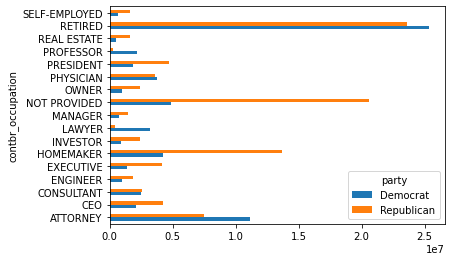

In [107]:
over_2mm.plot(kind='barh')

<AxesSubplot:xlabel='contbr_occupation'>

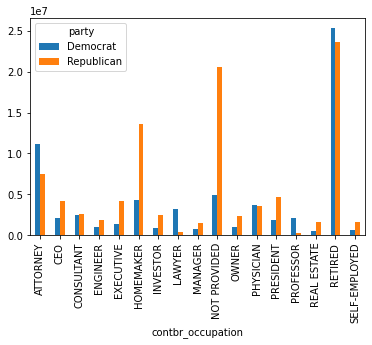

In [108]:
over_2mm.plot(kind='bar')

In [117]:
def get_top_amounts(df, key, n=5):
    totals= df.groupby(key)['contb_receipt_amt'].sum()
    return totals.nlargest(n)

In [118]:
grouped=fec_mrbo.groupby('cand_nm')
grouped.apply(get_top_amounts, 'contbr_occupation', n=7)

cand_nm        contbr_occupation                     
Obama, Barack  RETIRED                                   25305116.38
               ATTORNEY                                  11141982.97
               INFORMATION REQUESTED                      4866973.96
               HOMEMAKER                                  4248875.80
               PHYSICIAN                                  3735124.94
               LAWYER                                     3160478.87
               CONSULTANT                                 2459912.71
Romney, Mitt   RETIRED                                   11508473.59
               INFORMATION REQUESTED PER BEST EFFORTS    11396894.84
               HOMEMAKER                                  8147446.22
               ATTORNEY                                   5364718.82
               PRESIDENT                                  2491244.89
               EXECUTIVE                                  2300947.03
               C.E.O.                            

In [119]:
grouped.apply(get_top_amounts, 'contbr_employer', n=10)

cand_nm        contbr_employer                       
Obama, Barack  RETIRED                                   22694358.85
               SELF-EMPLOYED                             17080985.96
               NOT EMPLOYED                               8586308.70
               INFORMATION REQUESTED                      5053480.37
               HOMEMAKER                                  2605408.54
               SELF                                       1076531.20
               SELF EMPLOYED                               469290.00
               STUDENT                                     318831.45
               VOLUNTEER                                   257104.00
               MICROSOFT                                   215585.36
Romney, Mitt   INFORMATION REQUESTED PER BEST EFFORTS    12059527.24
               RETIRED                                   11506225.71
               HOMEMAKER                                  8147196.22
               SELF-EMPLOYED                     

In [120]:
bins=np.array([0,1,10,100,1000,10000,100000,1000000,10000000])

In [121]:
labels=pd.cut(fec_mrbo.contb_receipt_amt, bins)

In [122]:
labels

411         (10, 100]
412       (100, 1000]
413       (100, 1000]
414         (10, 100]
415         (10, 100]
             ...     
701381      (10, 100]
701382    (100, 1000]
701383        (1, 10]
701384      (10, 100]
701385    (100, 1000]
Name: contb_receipt_amt, Length: 694282, dtype: category
Categories (8, interval[int64, right]): [(0, 1] < (1, 10] < (10, 100] < (100, 1000] < (1000, 10000] < (10000, 100000] < (100000, 1000000] < (1000000, 10000000]]

In [123]:
grouped= fec_mrbo.groupby(['cand_nm', labels])

In [126]:
grouped.size().unstack(0)

cand_nm,"Obama, Barack","Romney, Mitt"
contb_receipt_amt,,
"(0, 1]",493,77
"(1, 10]",40070,3681
"(10, 100]",372280,31853
"(100, 1000]",153991,43357
"(1000, 10000]",22284,26186
"(10000, 100000]",2,1
"(100000, 1000000]",3,0
"(1000000, 10000000]",4,0


In [127]:
bucket_sums= grouped.contb_receipt_amt.sum().unstack(0)

In [129]:
normed_sums =bucket_sums.div(bucket_sums.sum(1) ,axis=0)

<AxesSubplot:ylabel='contb_receipt_amt'>

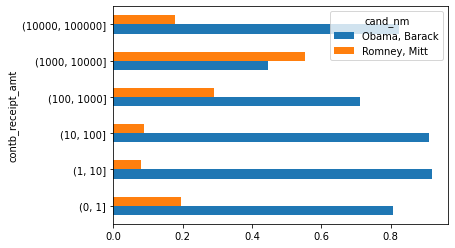

In [131]:
normed_sums[:-2].plot(kind='barh') #뒤에부터 -1 -2

In [132]:
grouped= fec_mrbo.groupby(['cand_nm', 'contbr_st'])
totals=grouped.contb_receipt_amt.sum().unstack(0).fillna(0)
totals=totals[totals.sum(1)>100000]

In [133]:
totals[:10] # 아메리카주 별로 집계

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,281840.15,86204.24
AL,543123.48,527303.51
AR,359247.28,105556.00
AZ,1506476.98,1888436.23
CA,23824984.24,11237636.60
CO,2132429.49,1506714.12
CT,2068291.26,3499475.45
DC,4373538.80,1025137.50
DE,336669.14,82712.00


In [134]:
percent=totals.div(totals.sum(1), axis=0)
percent[:10]

cand_nm,"Obama, Barack","Romney, Mitt"
contbr_st,,
AK,0.765778,0.234222
AL,0.507390,0.492610
AR,0.772902,0.227098
AZ,0.443745,0.556255
CA,0.679498,0.320502
CO,0.585970,0.414030
CT,0.371476,0.628524
DC,0.810113,0.189887
DE,0.802776,0.197224


In [2]:
import pandas as pd
import re
import konlpy
a=pd.read_excel("jejudoGwanGwang.xlsx")

b=pd.read_excel("jejuMatJip.xlsx")

c=pd.read_excel("jejuYeoHang.xlsx")

d=pd.read_excel("jejudoMatJip.xlsx")

df=pd.concat([a,b,c,d])
df

,content,date,like,place,tags
0,더 늦기전에 제주도로 떠나쟈😍.#제주핫플레이스 간단히 1탄 모아봄!#제주여행 요 필...,2018-12-07,"1,402",NaN,"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가..."
1,12월에 제주도를 가야하는이유🍊.#제주핫플 모음 끝판왕😍이거 하나면 겨울 #제주여행...,2018-12-03,368,NaN,"['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#..."
2,11월 놓치지 말아야 할 제주 관광.가을바람이 최고조에 이르는 11월추운 겨울을 앞...,2018-11-02,166,NaN,"['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',..."
3,국민학교세대#제주관광#제주살이#제주이주민#아라동주민#삼남매집 #새해첫날#드라이브#명...,2019-01-01,28,명월국민학교,"['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'..."
4,#제주관광 #제주 #돔나이트 #스트레스 #풀자 #춤추며 #땀날려 #가끔은괜찮아 #인...,2019-01-01,12,NaN,"['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추..."
...,...,...,...,...,...
4008,고객님들의 소중한사진 감사드립니다^^* . . . . . .제주도 핫플레이스 ● 모...,2018-12-31,8,NaN,"['#통갈치구이', '#성산일출봉맛집', '#성산일출봉', '#섭지코지맛집', '#..."
4009,고기 ㅂㄹ열무국수 맛집 김치찌개 맛집이라더니 이마저도 ㅂㄹ..알바생들도 ㅂㄹ..18...,2018-12-31,6,복자씨연탄구이,"['#복자씨연탄구이', '#복자씨연탄구이성산본점', '#제주흑돼지맛집', '#제주도..."
4010,제주’###############제주 #제주도맛집 #지주카페 #카페스타그램 #해맞이...,2018-12-31,42,NaN,"['#제주', '#제주도맛집', '#지주카페', '#카페스타그램', '#해맞이', ..."
4011,⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀-아지트샵 1등 으뜸멘...,2018-12-31,16,NaN,"['#아지트샵', '#아지트샵헹이', '#으뜸멘토헹이💕']"


In [ ]:
import folium
import pandas as pd
df=pd.read_excel("서울지역대학교위치.xlsx")
seoul_map = folium.Map(location=[37.55, 126.98], zoom_start =12)

for name, lat, long in zip(df.대학교, df.위도, df.경도):
    folium.Marker([lat, long], tooltip= name).add_to(seoul_map)
seoul_map    

AssertionError: phrase input should be string, not <class 'list'>

In [1]:
import pandas as pd
import re
import konlpy
a=pd.read_excel("jejudoGwanGwang.xlsx")

b=pd.read_excel("jejuMatJip.xlsx")

c=pd.read_excel("jejuYeoHang.xlsx")

d=pd.read_excel("jejudoMatJip.xlsx")

df=pd.concat([a,b,c,d])


In [2]:
st=df.place.value_counts().to_frame()
st=st.reset_index()




In [3]:
st1=' '.join(st['index'])
p=re.compile("[^가-힣]")
st2=p.sub(" ", st1)


In [4]:
hannanum=konlpy.tag.Hannanum()
nouns=hannanum.nouns(st2)


In [5]:
dff=pd.DataFrame(nouns)
dff.value_counts()[2:]

카페         9
게스트하우스     9
제주시        7
해변         6
함덕         5
          ..
블루밍아일랜드    1
블리스찬       1
비갠오후       1
비긴어게인펜션    1
힐          1
Length: 1048, dtype: int64

In [6]:
dfff =dff.value_counts()

In [7]:
dfffff=pd.DataFrame(dfff)
jeju=dfffff[2:]

In [8]:
jeju1=jeju.rename(columns={0: 'a'}).reset_index()
jeju2=jeju1.rename(columns={0:'loc'})
jeju2

,loc,a
0,카페,9
1,게스트하우스,9
2,제주시,7
3,해변,6
4,함덕,5
...,...,...
1043,블루밍아일랜드,1
1044,블리스찬,1
1045,비갠오후,1
1046,비긴어게인펜션,1


In [17]:
jeju_df = jeju2.drop(['카페'], axis=0)
jeju_df

KeyError: "['카페'] not found in axis"

In [9]:
from geopy.geocoders import Nominatim

def geocoding_lat(address):
    try: 
        geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
        geo = geolocoder.geocode(address)
        crd = {"lat": str(geo.latitude)} 
        return crd
    except:
        return 0
    
def geocoding_lng(address):
    try:
        geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
        geo = geolocoder.geocode(address)
        crd = {"lng": str(geo.latitude)} 
        return crd
    except:
        return


In [32]:
from geopy.geocoders import Nominatim

def geocoding(address):
    geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
    geo = geolocoder.geocode(address)
    crd = {"lat": str(geo.latitude), "lng": str(geo.longitude)}

    return crd

crd = geocoding("대구 태전동")
print(crd['lat'])
print(crd['lng'])

35.9234127
128.5459483


In [ ]:
#d['lat']=jeju.applymap(geocoding)
jeju2['lat']=jeju2['loc'].apply(geocoding_lat)
jeju2['lng']=jeju2['loc'].apply(geocoding_lng)


In [15]:
jeju2

,loc,a,lat,lng
0,카페,9,{'lat': '33.9531356'},{'lng': '33.9531356'}
1,게스트하우스,9,{'lat': '35.1441286'},{'lng': '35.1441286'}
2,제주시,7,{'lat': '33.4930566'},{'lng': '33.4930566'}
3,해변,6,{'lat': '11.8842785'},{'lng': '11.8842785'}
4,함덕,5,NaN,NaN
...,...,...,...,...
1043,블루밍아일랜드,1,NaN,NaN
1044,블리스찬,1,NaN,NaN
1045,비갠오후,1,NaN,NaN
1046,비긴어게인펜션,1,NaN,NaN


In [1]:
import pandas as pd
import re
import konlpy
a=pd.read_excel("jejudoGwanGwang.xlsx")

b=pd.read_excel("jejuMatJip.xlsx")

c=pd.read_excel("jejuYeoHang.xlsx")

d=pd.read_excel("jejudoMatJip.xlsx")

df=pd.concat([a,b,c,d])

In [ ]:
location_counts =df['place'].value_counts()

In [ ]:
location_counts_df = pd.DataFrame(location_counts)

In [ ]:
location_counts_df

,place
Jeju,347
Jeju-do,195
고래배꼽,145
Jungle Book by Alice,109
Seogwipo,83
...,...
돈테일러익스프레,1
쉼표,1
섭지코지 해변,1
공천포 식당,1


In [ ]:
location_counts_df=location_counts_df.reset_index()
location_counts_df

,index,place
0,Jeju,347
1,Jeju-do,195
2,고래배꼽,145
3,Jungle Book by Alice,109
4,Seogwipo,83
...,...,...
1032,돈테일러익스프레,1
1033,쉼표,1
1034,섭지코지 해변,1
1035,공천포 식당,1


In [ ]:
locations= list(location_counts.index)
locations

['Jeju',
 'Jeju-do',
 '고래배꼽',
 'Jungle Book by Alice',
 'Seogwipo',
 '월정리카페콧수염',
 '할로비치',
 '제주도 크리스마스 박물관',
 '제주에인감귤밭',
 'Jeju Island',
 '성산일출봉 城山日出峰  Seongsan Ilchulbong',
 '옹포리',
 '제주 함덕 서우봉 해변',
 '월정리해변',
 '오라게게스트하우스',
 '폼포코식당_pompokokitchen',
 '고집돌우럭중문점',
 '김녕미로공원 Jeju Kimnyoung Maze Park',
 '1100고지',
 'Nimome',
 '제주도 애월읍',
 '밥깡패',
 '애월늘',
 'Woljeongri Beach',
 '석부작박물관',
 '제주레포츠랜드',
 '서귀포 느영나영 게스트하우스',
 '면차롱',
 '알뜨르 비행장',
 '카멜리아 힐',
 '세화해수욕장',
 '제주 성산 신산포구자연산횟집 회포장',
 '제주신화월드 Jeju Shinhwa World',
 '협재해변 Beach',
 '연동 바오젠 거리',
 '제주도 서귀포 중문관광단지 濟州島西歸浦中文觀光團地',
 '사려니숲길',
 '외쿡식당',
 '제주고궁한복카페 jeju gogung hanbok studio',
 '제주어린왕자게스트하우스',
 '위미동백나무군락지',
 '용눈이오름',
 '카페한라산',
 '용머리해안',
 '광치기해변',
 'Jeju Aewol',
 '새별오름',
 '제주빅볼랜드',
 '캔디원',
 '하이엔드 제주',
 '옹포별장가든',
 '위미동백나무군락',
 '고집돌우럭-gozipfish',
 '한라산',
 '삼무공원',
 'Jeju Island 제주특별자치도 济州道',
 '제주커피박물관 Baum',
 '서우봉',
 '마마뜰',
 '휴애리 자연생활공원',
 '제주 송악산',
 '위미2리 동백군락지',
 '제주 꿈꾸는고래 스쿠버&게스트하우스',
 '곽지해수욕장',
 '제주동문재래시장',
 '오후새우시',
 '녹근로33',
 '인생밥집',
 '한라산 (漢拏

In [ ]:
from geopy.geocoders import Nominatim

def geocoding(address):
    geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
    geo = geolocoder.geocode(address)
    crd = {"lat": str(geo.latitude), "lng": str(geo.longitude)}

    return crd

crd = geocoding("대구 태전동")
print(crd['lat'])
print(crd['lng'])

In [8]:
import requests

In [9]:
from tqdm import tqdm_notebook

In [10]:
import time

In [54]:
locations_inform=[]
for location in tqdm_notebook(locations):
    try:
        data= geocoding(location)
        locations_inform.append(data)
        time.sleep(0.5)
    except:
         0
locations_inform    

C:\Users\admin\AppData\Local\Temp\ipykernel_3424\688300967.py:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for location in tqdm_notebook(locations):


  0%|          | 0/1037 [00:00<?, ?it/s]

[{'lat': '33.3939924', 'lng': '126.5626653'},
 {'lat': '33.3939924', 'lng': '126.5626653'},
 {'lat': '33.2572971', 'lng': '126.515299'},
 {'lat': '33.38034745', 'lng': '126.54825445912047'},
 {'lat': '33.4584505', 'lng': '126.9420221'},
 {'lat': '33.4023469', 'lng': '126.2547808'},
 {'lat': '33.4937569', 'lng': '126.4309206'},
 {'lat': '33.45079', 'lng': '126.3752'},
 {'lat': '33.4528696', 'lng': '126.3417842'},
 {'lat': '33.55599275', 'lng': '126.79603122376355'},
 {'lat': '33.3068325', 'lng': '126.3159087'},
 {'lat': '33.423008', 'lng': '126.6259316'},
 {'lat': '33.4599065', 'lng': '126.8325016'},
 {'lat': '33.23332565', 'lng': '126.3130364256601'},
 {'lat': '33.4530683', 'lng': '126.9249291'},
 {'lat': '33.47380604999999', 'lng': '126.40575251570422'},
 {'lat': '33.3663086', 'lng': '126.3574576'},
 {'lat': '33.4059044', 'lng': '126.4064712115665'},
 {'lat': '33.3617536', 'lng': '126.5291977'},
 {'lat': '33.4915876', 'lng': '126.49131468518968'},
 {'lat': '33.38034745', 'lng': '126.5

In [57]:
import numpy as np
crd = []
for i in range(len(locations)):
    try:
        crd.append(geocoding(locations[i]))
    except:
        crd.append(np.nan) 
crd

[{'lat': '33.3939924', 'lng': '126.5626653'},
 {'lat': '33.3939924', 'lng': '126.5626653'},
 nan,
 nan,
 {'lat': '33.2572971', 'lng': '126.515299'},
 nan,
 nan,
 nan,
 nan,
 {'lat': '33.38034745', 'lng': '126.54825445912047'},
 {'lat': '33.4584505', 'lng': '126.9420221'},
 {'lat': '33.4023469', 'lng': '126.2547808'},
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 {'lat': '33.4937569', 'lng': '126.4309206'},
 {'lat': '33.45079', 'lng': '126.3752'},
 {'lat': '33.4528696', 'lng': '126.3417842'},
 nan,
 {'lat': '33.55599275', 'lng': '126.79603122376355'},
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 {'lat': '33.3068325', 'lng': '126.3159087'},
 nan,
 nan,
 nan,
 {'lat': '33.423008', 'lng': '126.6259316'},
 nan,
 nan,
 nan,
 nan,
 {'lat': '33.4599065', 'lng': '126.8325016'},
 nan,
 {'lat': '33.23332565', 'lng': '126.3130364256601'},
 {'lat': '33.4530683', 'lng': '126.9249291'},
 {'lat': '33.47380604999999', 'lng': '126.40575251570422'},
 {'lat': '33.3663086', 'lng': '126.3574576'},
 {'lat':

In [55]:
locations_inform_df =pd.DataFrame(locations_inform)
locations_inform_df

,lat,lng
0,33.3939924,126.5626653
1,33.3939924,126.5626653
2,33.2572971,126.515299
3,33.38034745,126.54825445912047
4,33.4584505,126.9420221
...,...,...
342,33.4698168,126.9222953
343,33.3391601,126.8555247
344,33.4497382,126.9206376
345,33.2358257,126.3673505


In [34]:
locations_inform_df.columns=['경도','위도']

locations_inform_df

,경도,위도
0,33.3939924,126.5626653
1,33.3939924,126.5626653
2,33.2572971,126.515299
3,33.38034745,126.54825445912047
4,33.4584505,126.9420221
...,...,...
342,33.4698168,126.9222953
343,33.3391601,126.8555247
344,33.4497382,126.9206376
345,33.2358257,126.3673505


In [42]:
c=location_counts_df.drop('place', axis=1)
c

,index
0,Jeju
1,Jeju-do
2,고래배꼽
3,Jungle Book by Alice
4,Seogwipo
...,...
1032,돈테일러익스프레
1033,쉼표
1034,섭지코지 해변
1035,공천포 식당


In [50]:
location_data=pd.concat([ c, locations_inform_df],axis=1)
jeju=location_data[:348]
jeju

,index,경도,위도
0,Jeju,33.3939924,126.5626653
1,Jeju-do,33.3939924,126.5626653
2,고래배꼽,33.2572971,126.515299
3,Jungle Book by Alice,33.38034745,126.54825445912047
4,Seogwipo,33.4584505,126.9420221
...,...,...,...
341,쌀다방,33.4886311,126.681166
342,Hotel NANTA 호텔 난타,33.4698168,126.9222953
343,제주돈아,33.3391601,126.8555247
344,Ecoland Theme Park Forest Train黃花小火車,33.4497382,126.9206376


In [ ]:
location_data=location_data.pivot_table(index=['name_official','경도','위도'], value='place', aggfunc='sum')

In [ ]:
import folium
Mt_Hanla=[33.362500, 126.533694]
map_jeju=folium.Map(location=Mt_hanla, zoom_start =11)

for i in range(len(location_data)):
    name=location_data['name_official'][i]
    count

In [51]:
import folium
import pandas as pd
df=jeju
jeju_map = folium.Map(location=[33.362500, 126.533694], zoom_start =12)

for name, lat, long in zip(df['index'], df['경도'], df['위도']):
    folium.Marker([lat, long], tooltip= name).add_to(jeju_map)
jeju_map

In [ ]:
import folium
import pandas as pd
df=jeju
jeju_map = folium.Map(location=[33.362500, 126.533694], zoom_start =12)

for name, lat, long in zip(df['index'], df['경도'], df['위도']):
    folium.Marker([lat, long], tooltip= name).add_to(jeju_map)
jeju_map

In [ ]:
import pandas as pd
import openpyxl

GwanGwang = pd.read_excel('jejudoGwanGwang.xlsx')
jejudoMatJip = pd.read_excel('jejudoMatJip.xlsx')
jejuMatJip = pd.read_excel('jejuMatJip.xlsx')
jejuYeoHang = pd.read_excel('jejuYeoHang.xlsx')

# 중복데이터는 거르고 결합..하고 싶다
# df1.combine_first(df2) ====> df1을 기준으로 df2를 중복없이 결합하겠다.
jejuGwanGwang1 = GwanGwang.combine_first(jejudoMatJip)
jejuGwanGwang1 = jejuGwanGwang1.combine_first(jejuMatJip)
jejuGwanGwang1 = jejuGwanGwang1.combine_first(jejuYeoHang)
jejuGwanGwang1[:2]

location_count = pd.DataFrame(jejuGwanGwang1)
location_count

jejuGwanGwang1['place'].value_counts()

import requests

def place_find(s) :
    # 접속 url
    url = '
http://dapi.kakao.com/v2/local/search/keyword.json?query={}
'.format(s)
    
    # headers 입력
    headers = {
        # 카카오지도 접속
        "Authorization" : "KakaoAK 095562b7356dfd5360e2c6860f69d4b2"
    }
    # API 요청
    palces = requests.get(url, headers=headers).json()['documents']
    try :
        palces = palces[0]
        jejuGwanGwang1_name  = palces['place_name']
        위도 = palces['y']
        경도 = palces['x']
        
        result = [jejuGwanGwang1_name, 위도, 경도]
        
        return result
    except:
        pass

# 테스트
place_find('청초수물회&섭국 [신관]')

# 혹시 있을지 모르는 결측치를 제거하고싶다
a = jejuGwanGwang1['place'].dropna()
a.value_counts()

# 위경도 가져오기
jeju_palce_list = []

for a in a :
    try :
        # 카카오 API사용한 사용자 함수로 던지기
        data = place_find(a)
        jeju_palce_list.append(data)
    except :
        pass

# 복사
jeju_palce_list_1 = jeju_palce_list
# None 값 삭제
jeju_palce_list_1 =  [x for x in jeju_palce_list_1 if x is not None]
# 확인
jeju_palce_list_1

jeju_palce = pd.DataFrame(jeju_palce_list_1)
# 컬럼 명 지정해주기
jeju_palce.columns = ['place_name', '위도', '경도']
# '제주도'는 의미 없을거 같아서 제거 # 제주도 제주도가 같은 것은 False가 나옴
# 같은데 같지 않다라고 했으니까 
jeju_palce = jeju_palce[(jeju_palce['place_name'] != ['제주도',,,,,,])] 
jeju_palce

# 제주도 지도
import folium
jejuMap = 
folium.Map
(location=[33.36, 126.52], zoom_start = 10)

from folium.plugins import MarkerCluster

import folium

from folium.plugins import MarkerCluster
marker_cluster = MarkerCluster().add_to(jejuMap)

for i in range(len(jeju_palce)):
    folium.Marker(
        location = [jeju_palce.iloc[i]['위도'], jeju_palce.iloc[i]['경도']],
        popup = jeju_palce.iloc[i]['place_name'],
        icon = folium.Icon(color='blue',icon='ok'),
    ).add_to(marker_cluster)

jejuMap 

In [ ]:
#folium

#pip install folium
import pandas as pd

import folium

import pandas as pd
df_1 = pd.read_excel('jejuMatJip.xlsx')
df_2 = pd.read_excel('jejudoMatJip.xlsx')
df_3 = pd.read_excel('jejuYeoHang.xlsx')
df_4 = pd.read_excel('jejudoGwanGwang.xlsx')

df_place=list(df_1.place.unique())+list(df_2.place.unique())+list(df_3.place.unique())+list(df_4.place.unique())

len(df_place)

# 카카오API를 사용하여 주소->좌표 변환
import requests, json

def get_location(address):
  url = '
https://dapi.kakao.com/v2/local/search/address.json?query=
' + address
  # 'KaKaoAK '는 그대로 두시고 개인키만 지우고 입력해 주세요.
  # ex) KakaoAK 6af8d4826f0e56c54bc794fa8a294
#  headers = {"Authorization": "KakaoAK 개인키"}
  headers = {"Authorization": "KakaoAK ____________________"}
  api_json = json.loads(str(requests.get(url,headers=headers).text))
  address = api_json['documents'][0]['address']
  crd = {"lat": str(address['y']), "lng": str(address['x'])}
  address_name = address['address_name']

  return crd

pip install geopy

import geopy

from geopy.geocoders import Nominatim

def geocoding(address):
    geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
    geo = geolocoder.geocode(address)
    crd = {"lat": str(geo.latitude), "lng": str(geo.longitude)}

    return crd

import numpy as np
crd = []
for i in range(len(df_place)):
  try :
      crd.append(geocoding(df_place[i]))
  except:
    crd.append(np.nan) 

len(crd)

crd

df = pd.DataFrame({'지역명' : df_place, '위치' : crd})

df2 = df[df.위치.isna() != 1]

df2 = df2.reset_index()
df2

df2 = df2.drop('index', axis = 1)

df2.to_csv('jejumap.csv')

df2['위도'] = 0
df2['경도'] = 0
for i in range(len(df2.위치)):
    df2['위도'].iloc[i] = float(df2.위치[:][i]['lat'])
    df2['경도'].iloc[i] = float(df2.위치[:][i]['lng'])


jejumap = 
folium.Map
(location = [33.26,126.5],zoom_start=12)
for name, lat, lng in zip(df2.지역명, df2.위도, df2.경도):
    folium.Marker([lat, lng], popup=name).add_to(jejumap)

# 지도를 HTML 파일로 저장하기
jejumap.save
('./top5.html')

df3 = df2[((df2.위도 >= 33.11) & (df2.위도 <= 34.0)) & ((df2.경도 >= 126.0) & (df2.경도 <= 127.0))]

# 북위 331127～333350, 동경 1260843″～1265820

df3 = df3.reset_index().drop('index', axis = 1)

df3

df3['color'] = ''
df3['dataframe'] = 0
for i in range(len(df3)):
  if df3.지역명.iloc[i] in list(df_1.place.unique()) :
    df3['dataframe'].iloc[i] = 1
    df3['color'].iloc[i] = 'blue'
  elif df3.지역명.iloc[i] in list(df_2.place.unique()) :
    df3['dataframe'].iloc[i]  = 2
    df3['color'].iloc[i] = 'yellow'
  elif df3.지역명.iloc[i] in list(df_3.place.unique()):
    df3['dataframe'].iloc[i]  = 3
    df3['color'].iloc[i] = 'red'
  elif df3.지역명.iloc[i] in list(df_4.place.unique()):
    df3['dataframe'].iloc[i]  = 4
    df3['color'].iloc[i] = 'green'
  else :
    df3['color'].iloc[i] = 'black'

df_list = []
for i in range(len(df3)):
  if df3.dataframe.iloc[i] == 1:
    df_list.append(df_1[df_1.place == df3.지역명.iloc[i]])
  elif df3.dataframe.iloc[i] == 2:
    df_list.append(df_2[df_2.place == df3.지역명.iloc[i]])
  elif df3.dataframe.iloc[i] == 3:
    df_list.append(df_3[df_3.place == df3.지역명.iloc[i]])
  elif df3.dataframe.iloc[i] == 4:
    df_list.append(df_4[df_4.place == df3.지역명.iloc[i]])


jejumap = 
folium.Map
(location = [33.26,126.5],zoom_start=12)
for name, lat, lng, color in zip(df3.지역명, df3.위도, df3.경도, df3.color):
    folium.Marker([lat, lng], popup=folium.Popup(f'지역명 : {name}<br>', min_width=200, max_width=200),icon=folium.Icon(color = color)).add_to(jejumap)

# 지도를 HTML 파일로 저장하기
jejumap.save
('./jejumap.html')


df3.to_csv('jeju.csv') 

In [66]:
locations_inform_df = pd.DataFrame({'지역명' : locations, '위치' : crd})
locations_inform_df

,지역명,위치
0,Jeju,"{'lat': '33.3939924', 'lng': '126.5626653'}"
1,Jeju-do,"{'lat': '33.3939924', 'lng': '126.5626653'}"
2,고래배꼽,NaN
3,Jungle Book by Alice,NaN
4,Seogwipo,"{'lat': '33.2572971', 'lng': '126.515299'}"
...,...,...
1032,돈테일러익스프레,NaN
1033,쉼표,"{'lat': '37.4903652', 'lng': '126.726578717832..."
1034,섭지코지 해변,NaN
1035,공천포 식당,NaN


In [71]:
df2 = locations_inform_df[locations_inform_df.위치.isna() != 1]

df2 # 결측치 제거 

,지역명,위치
0,Jeju,"{'lat': '33.3939924', 'lng': '126.5626653'}"
1,Jeju-do,"{'lat': '33.3939924', 'lng': '126.5626653'}"
4,Seogwipo,"{'lat': '33.2572971', 'lng': '126.515299'}"
9,Jeju Island,"{'lat': '33.38034745', 'lng': '126.54825445912..."
10,성산일출봉 城山日出峰 Seongsan Ilchulbong,"{'lat': '33.4584505', 'lng': '126.9420221'}"
...,...,...
1005,오조해녀의집,"{'lat': '33.4698168', 'lng': '126.9222953'}"
1013,숨비아일랜드,"{'lat': '33.3391601', 'lng': '126.8555247'}"
1016,스타벅스 제주성산dt점,"{'lat': '33.4497382', 'lng': '126.9206376'}"
1017,자갈자갈,"{'lat': '33.2358257', 'lng': '126.3673505'}"


In [82]:
df2=df2.reset_index()
df2

,index,지역명,위치,위도,경도
0,0,Jeju,"{'lat': '33.3939924', 'lng': '126.5626653'}",33.393992,126.562665
1,1,Jeju-do,"{'lat': '33.3939924', 'lng': '126.5626653'}",33.393992,126.562665
2,4,Seogwipo,"{'lat': '33.2572971', 'lng': '126.515299'}",0.000000,0.000000
3,9,Jeju Island,"{'lat': '33.38034745', 'lng': '126.54825445912...",0.000000,0.000000
4,10,성산일출봉 城山日出峰 Seongsan Ilchulbong,"{'lat': '33.4584505', 'lng': '126.9420221'}",0.000000,0.000000
...,...,...,...,...,...
342,1005,오조해녀의집,"{'lat': '33.4698168', 'lng': '126.9222953'}",0.000000,0.000000
343,1013,숨비아일랜드,"{'lat': '33.3391601', 'lng': '126.8555247'}",0.000000,0.000000
344,1016,스타벅스 제주성산dt점,"{'lat': '33.4497382', 'lng': '126.9206376'}",0.000000,0.000000
345,1017,자갈자갈,"{'lat': '33.2358257', 'lng': '126.3673505'}",0.000000,0.000000


In [83]:
df2['위도'] = 0
df2['경도'] = 0
for i in range(len(df2.위치)):
    df2['위도'].iloc[i] = float(df2.위치[:][i]['lat'])
    df2['경도'].iloc[i] = float(df2.위치[:][i]['lng'])
df2    

C:\Users\admin\AppData\Local\Temp\ipykernel_3424\1437980944.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['위도'].iloc[i] = float(df2.위치[:][i]['lat'])
C:\Users\admin\AppData\Local\Temp\ipykernel_3424\1437980944.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['경도'].iloc[i] = float(df2.위치[:][i]['lng'])


,index,지역명,위치,위도,경도
0,0,Jeju,"{'lat': '33.3939924', 'lng': '126.5626653'}",33.393992,126.562665
1,1,Jeju-do,"{'lat': '33.3939924', 'lng': '126.5626653'}",33.393992,126.562665
2,4,Seogwipo,"{'lat': '33.2572971', 'lng': '126.515299'}",33.257297,126.515299
3,9,Jeju Island,"{'lat': '33.38034745', 'lng': '126.54825445912...",33.380347,126.548254
4,10,성산일출봉 城山日出峰 Seongsan Ilchulbong,"{'lat': '33.4584505', 'lng': '126.9420221'}",33.458450,126.942022
...,...,...,...,...,...
342,1005,오조해녀의집,"{'lat': '33.4698168', 'lng': '126.9222953'}",33.469817,126.922295
343,1013,숨비아일랜드,"{'lat': '33.3391601', 'lng': '126.8555247'}",33.339160,126.855525
344,1016,스타벅스 제주성산dt점,"{'lat': '33.4497382', 'lng': '126.9206376'}",33.449738,126.920638
345,1017,자갈자갈,"{'lat': '33.2358257', 'lng': '126.3673505'}",33.235826,126.367351


In [77]:
df=df2
jeju_map = folium.Map(location=[33.362500, 126.533694], zoom_start =12)

for name, lat, long in zip(df2['지역명'], df2['위도'], df2['경도']):
    folium.Marker([lat, long], tooltip= name).add_to(jeju_map)
jeju_map

In [ ]:
# 최소 요약 코드 

import pandas as pd
import re
import konlpy
a=pd.read_excel("jejudoGwanGwang.xlsx")

b=pd.read_excel("jejuMatJip.xlsx")

c=pd.read_excel("jejuYeoHang.xlsx")

d=pd.read_excel("jejudoMatJip.xlsx")

df=pd.concat([a,b,c,d])

location_counts =df['place'].value_counts()
location_counts_df = pd.DataFrame(location_counts)
location_counts_df
location_counts_df=location_counts_df.reset_index()
location_counts_df
locations= list(location_counts.index)
locations
from geopy.geocoders import Nominatim

def geocoding(address):
    geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
    geo = geolocoder.geocode(address)
    crd = {"lat": str(geo.latitude), "lng": str(geo.longitude)}

    return crd

crd = geocoding("대구 태전동")
print(crd['lat'])
print(crd['lng'])

import numpy as np
crd = []
for i in range(len(locations)):
    try:
        crd.append(geocoding(locations[i]))
    except:
        crd.append(np.nan) 
crd

locations_inform_df = pd.DataFrame({'지역명' : locations, '위치' : crd})
locations_inform_df


df2 = locations_inform_df[locations_inform_df.위치.isna() != 1]

df2 

df2=df2.reset_index()
df2

df2['위도'] = 0
df2['경도'] = 0
for i in range(len(df2.위치)): # 위치칼럼 전체에서 lat만 가져옴 
    df2['위도'].iloc[i] = float(df2.위치[:][i]['lat'])
    df2['경도'].iloc[i] = float(df2.위치[:][i]['lng'])
df2  


df=df2
jeju_map = folium.Map(location=[33.362500, 126.533694], zoom_start =12)

for name, lat, long in zip(df2['지역명'], df2['위도'], df2['경도']):
    folium.Marker([lat, long], tooltip= name).add_to(jeju_map)
jeju_map


In [84]:
3**2 != 9

False